# Проверка гипотез в бизнесе - Аренда самокатов GoFast

# Описание данных

Таблица с пользователями `users_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `name` — имя пользователя.

- `age` — возраст.

- `city` — город.

- `subscription_type` — тип подписки: `free`, `ultra`.

Таблица с поездками `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `distance` — расстояние в метрах, которое пользователь проехал в текущей сессии.

- `duration` — продолжительность сессии в минутах, то есть время с того момента, как пользователь нажал кнопку «Начать поездку», до того, как он нажал кнопку «Завершить поездку».

- `date` — дата совершения поездки.

Таблица с подписками `subscriptions_go.csv`

- `subscription_type` — тип подписки.

- `minute_price` — стоимость одной минуты поездки по этой подписке.

- `start_ride_price` — стоимость начала поездки.

- `subscription_fee` — стоимость ежемесячного платежа.

---
## Задание 1. Загрузка данных

### Задача 1.1 Импорт библиотеки pandas

In [ ]:
import pandas as pd

### Задача 1.2 Чтение данных

In [ ]:
df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Задача 1.3 Печать первых строк


<details>
<summary>Открыть подсказку</summary>
Чтобы распечатать несколько датафреймов в одной ячейке, можно воспользоваться функцией <code>display()</code>.
</details>

In [ ]:
df_users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
df_rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
df_subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Задача 1.4 Подсчёт строк

In [ ]:
print(df_users_go.shape[0], df_rides_go.shape[0], df_subscriptions_go.shape[0])

1565 18068 2


---
## Задание 2. Знакомство с данными и их предварительная подготовка


### Задача 2.1 Определение типов данных

In [ ]:
print(df_rides_go.dtypes)

user_id       int64
distance    float64
duration    float64
date         object
dtype: object


### Задача 2.2 Преобразование формата даты

In [ ]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])

### Задача 2.3 Создание столбца с месяцем

In [ ]:
df_rides_go['month'] = df_rides_go['date'].dt.month

### Задача 2.4 Поиск дублей и пропусков

In [ ]:
missing = df_users_go.isna().sum().sum()
duplicates = df_users_go.duplicated().sum()
print(missing, duplicates)


0 31


### Задача 2.5 Заполнение пропусков и удаление дублей

In [ ]:
df_users_go = df_users_go.drop_duplicates()

### Задача 2.6 Округление длительности поездки

In [ ]:
df_rides_go['duration'] = df_rides_go['duration'].round().astype(int)

---
## Задание 3. Исследовательский анализ данных (EDA)


### Задача 3.1 Импорт библиотеки matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Задача 3.2 Количество пользователей по городам.

In [ ]:
users_by_city_count = df_users_go['city'].value_counts()
print(users_by_city_count)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


### Задача 3.3 Количество пользователей подписки

In [ ]:
subscription_type_count = df_users_go['subscription_type'].value_counts()
print(subscription_type_count)

free     835
ultra    699
Name: subscription_type, dtype: int64


### Задача 3.4 Круговая диаграмма

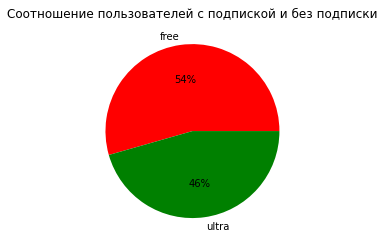

In [ ]:
subscription_type_count.plot(
    kind= 'pie',
    title='Соотношение пользователей с подпиской и без подписки',
    autopct= '%.0f%%',
    ylabel= '',
    colors=['red', 'green']
)

plt.show()

### Задача 3.5 Гистограмма возрастов

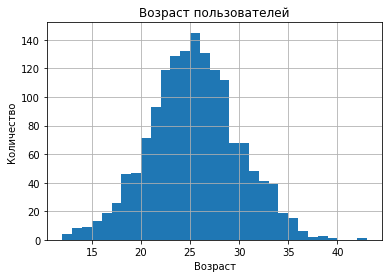

In [ ]:
# Определяем количество бинов
n_bins = df_users_go['age'].max() - df_users_go['age'].min()

# Строим гистограмму
df_users_go['age'].hist(bins=n_bins)

# Настраиваем график
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')  # Можно добавить для наглядности

# Отображаем график
plt.show()

### Задача 3.6 Несовершеннолетние пользователи

In [ ]:
users_under_18_ratio = int(
    df_users_go[df_users_go['age'] < 18].shape[0] / df_users_go.shape[0] * 100
)
print(f'Доля несовершеннолетних пользователей самокатов составляет {users_under_18_ratio}%.')

Доля несовершеннолетних пользователей самокатов составляет 5%.


### Задача 3.7 Характеристики длительности поездки


In [ ]:
duration_mean = round(df_rides_go['duration'].mean())
duration_std = round(df_rides_go['duration'].std())

duration_pct25 = round(df_rides_go['duration'].quantile(0.25))
duration_pct75 = round(df_rides_go['duration'].quantile(0.75))

print(f'Средняя длительность поездки {duration_mean} минут со стандартным отклонением {duration_std}. Основная часть поездок занимает от {duration_pct25} до {duration_pct75} минут.')

Средняя длительность поездки 18 минут со стандартным отклонением 6. Основная часть поездок занимает от 14 до 22 минут.


---
## Задание 4. Объединение данных


### Задача 4.1 Объединение таблицы пользователей и поездок

In [ ]:
df = df_users_go.merge(df_rides_go, on='user_id', how='left')

### Задача 4.2 Присоединение информации о подписках


In [ ]:
df = df.merge(df_subscriptions_go, on='subscription_type', how='left')

### Задача 4.3. Размеры объединённого датафрейма

In [ ]:
# Выводим первые строки датафрейма
display(df.head(5))

# Выводим количество строк и столбцов в объединённом датафрейме
n_rows, n_cols = df.shape
print(f'В полученном датафрейме {n_rows} строк и {n_cols} столбцов.')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26,2021-08-28,8,6,0,199


В полученном датафрейме 18068 строк и 12 столбцов.


### Задача 4.4 Отдельные датафреймы для пользователей с подпиской и без

In [ ]:
# Создаём датафрейм для пользователей с подпиской (ultra)
df_ultra = df[df['subscription_type'] == 'ultra']

# Создаём датафрейм для пользователей без подписки (free)
df_free = df[df['subscription_type'] == 'free']

### Задача 4.5 Гистограмма длительности поездок для обоих групп

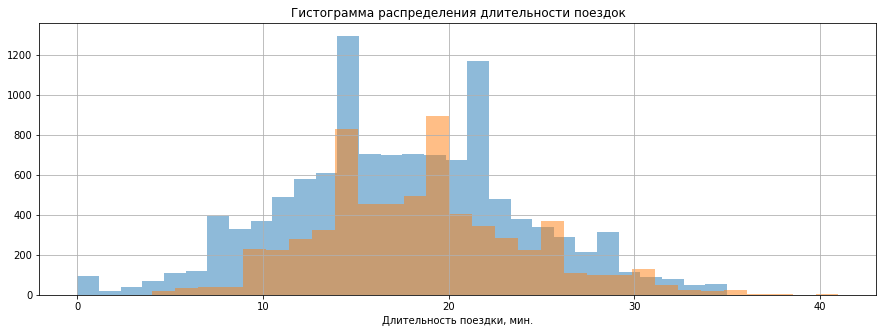

Средняя длительность поездки для пользователей без подписки 17 мин, а для пользователей с подпиской 19 мин


In [ ]:
# Гистограмма длительности поездки для пользователей с подпиской и без
plt.figure(figsize=(15, 5))

# Гистограмма для пользователей без подписки (free)
df_free['duration'].hist(bins=30, alpha=0.5, label='free')

# Гистограмма для пользователей с подпиской (ultra)
df_ultra['duration'].hist(bins=30, alpha=0.5, label='ultra')

# Устанавливаем подпись оси X
plt.xlabel('Длительность поездки, мин.')

# Устанавливаем заголовок графика
plt.title('Гистограмма распределения длительности поездок')

plt.show()

# Расчет и вывод на экран средней длительности поездки для пользователей с подпиской и без
mean_duration_free = round(df_free['duration'].mean())
mean_duration_ultra = round(df_ultra['duration'].mean())
print(f'Средняя длительность поездки для пользователей без подписки {mean_duration_free} мин, а для пользователей с подпиской {mean_duration_ultra} мин')

---
## Задание 5. Подсчёт выручки


### Задача 5.1 Данные сгруппированные по нужным колонкам


In [ ]:
df_gp = df.groupby(['user_id', 'name', 'subscription_type', 'month'], as_index=False)

### Задача 5.2 Подсчёт агрегированных метрик
Создание нового датафрейма `df_agg`:
- `total_distance` — сумма значений в столбце `distance`.
- `total_duration` — сумма значений в столбце `duration`.
- `rides_count` — количество элементов в столбце `duration`.
- `subscription_type` — первое значение в группе для столбца `subscription_type`.
- `minute_price` — первое значение в группе для столбца `minute_price`.
- `start_ride_price` — первое значение в группе для столбца `start_ride_price`.
- `subscription_fee` — первое значение в группе для столбца `subscription_fee`.

In [ ]:
df_agg = df_gp.agg( # Укажите подходящий инструмент здесь
    total_distance=('distance', 'sum'),
    total_duration=('duration', 'sum') ,
    rides_count=('duration', 'count') ,
    subscription_type=('subscription_type', 'first') ,
    minute_price=('minute_price', 'first') ,
    start_ride_price=('start_ride_price', 'first') ,
    subscription_fee=('subscription_fee', 'first') ,
)

### Задача 5.3 Функция для подсчёта выручки
Функция `calculate_monthly_revenue(row)` для расчёта месячной выручки по формуле:

`monthly_revenue` = `start_ride_price` * `rides_count` + `minute_price` * `total_duration` + `subscription_fee`


In [ ]:
def calculate_monthly_revenue(row):
    return (
        row['start_ride_price'] * row['rides_count'] +
        row['minute_price'] * row['total_duration'] +
        row['subscription_fee']
    )

### Задача 5.4 Создание столбца с месячной выручкой на пользователя

In [ ]:
df_agg['monthly_revenue'] = df_agg.apply(calculate_monthly_revenue, axis=1)

### Задача 5.5 Поиск пользователя с максимальной выручкой


In [ ]:
# Группируем по user_id и name, суммируя месячную выручку
user_revenue_total = df_agg.groupby(['user_id', 'name'])['monthly_revenue'].sum().reset_index()

# Находим строку с максимальной суммарной выручкой
top_user = user_revenue_total.loc[user_revenue_total['monthly_revenue'].idxmax()]

# Фильтрация по user_id и name найденного пользователя
top_user_data = df_agg[
    (df_agg['user_id'] == top_user['user_id']) &
    (df_agg['name'] == top_user['name'])
]
# Выводим только нужные столбцы
print(top_user_data[['user_id', 'name', 'month', 'rides_count', 'monthly_revenue']])

      user_id       name  month  rides_count  monthly_revenue
8877     1236  Александр      1            2              228
8878     1236  Александр      2            3              614
8879     1236  Александр      3            5              762
8880     1236  Александр      4            1              202
8881     1236  Александр      5            3              574
8882     1236  Александр      6            1              282
8883     1236  Александр      7            1              290
8884     1236  Александр      8            2              452
8885     1236  Александр      9            1              122
8886     1236  Александр     10            3              430
8887     1236  Александр     11            3              494
8888     1236  Александр     12            2              476


---
## Задание 6. Проверка гипотез

### Задача 6.1 Импорт библиотеки SciPy

In [ ]:
import scipy.stats as st

### Задача 6.2 Вспомогательная функция для интерпретации результатов

In [ ]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
        if p_value < alpha:
            print(f"Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.")
        else:
            print(f"Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.")

print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.3 Длительность для пользователей с подпиской и без

Тратят ли пользователи с подпиской больше времени на поездки?

- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое.
- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.


In [ ]:
ultra_duration = df_ultra['duration']
free_duration = df_free['duration']

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater') # Укажите подходящий инструмент здесь
p_value = results.pvalue
print_stattest_results(p_value)
ultra_mean_duration = round(ultra_duration.mean(), 2)
free_mean_duration = round(free_duration.mean(), 2)

print(f'Средняя длительность поездки тарифа Ultra {ultra_mean_duration}')
print(f'Средняя длительность поездки тарифа Free {free_mean_duration}')

Полученное значение p_value=3.1600689435611813e-35 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя длительность поездки тарифа Ultra 18.55
Средняя длительность поездки тарифа Free 17.39


### Задача 6.4 Длительность поездки: больше или меньше критического значения

Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров?

- Нулевая гипотеза (Н0): Средняя дистанция поездки у пользователей с подпиской равна 3130 м.

- Альтернативная гипотеза (Н1): Средняя дистанция поездки у пользователей с подпиской больше 3130 м.


In [ ]:
null_hypothesis = 3130
ultra_distance = df_ultra['distance']

results = st.ttest_1samp(ultra_distance, null_hypothesis, alternative='greater' )
p_value = results.pvalue
print_stattest_results(p_value)

Полученное значение p_value=0.9195368847849785 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.5 Прибыль от пользователей с подпиской и без
Гипотеза: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

- Нулевая гипотеза (Н0): Средняя месячная выручка у пользователей с подпиской и без подписки одинаковая.
- Альтернативная гипотеза (Н1): Средняя месячная выручка у пользователей с подпиской выше, чем у пользователей без подписки.

In [ ]:
revenue_ultra = df_agg[df_agg['subscription_type'] == 'ultra']['monthly_revenue']
revenue_free = df_agg[df_agg['subscription_type'] == 'free']['monthly_revenue']

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value)

mean_revenue_ultra = round(revenue_ultra.mean())
mean_revenue_free = round(revenue_free.mean())

print(f'Средняя выручка подписчиков Ultra {mean_revenue_ultra} руб')
print(f'Средняя выручка подписчиков Free {mean_revenue_free} руб')

Полученное значение p_value=1.7274069878387966e-37 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя выручка подписчиков Ultra 359 руб
Средняя выручка подписчиков Free 322 руб


---
## Задание 7. Распределения

В компании возникла идея предлагать дополнительную скидку подписчикам, совершающим длительные поездки продолжительностью более 30 минут.
- Оценка доли таких поездок.

### Задача 7.1 Расчёт выборочного среднего и стандартного отклонения

In [ ]:
# Вычисляем среднее значение
mu = df_ultra['duration'].mean()

# Вычисляем стандартное отклонение
sigma = df_ultra['duration'].std()

# Задаём целевое время
target_time = 30

# Делаем вывод
print(f'Средняя длительность поездки {round(mu, 1)}, стандартное отклонение {round(sigma)}.')

Средняя длительность поездки 18.5, стандартное отклонение 6.


### Задача 7.2 Вычисление значения функции распределения в точке (CDF)


In [ ]:
# Вычисляем вероятность того, что случайная величина будет меньше указанного значения или равна ему

duration_norm_dist  = st.norm(loc=mu, scale=sigma)
prob = round(1 - duration_norm_dist.cdf(target_time), 3) # Используем CDF для нахождения накопленной вероятности

print(f'Вероятность поездки более 30 минут {prob}')

Вероятность поездки более 30 минут 0.02


### Задача 7.3 Вероятность для интервала (CDF)
Коллеги посчитали, что процент пользователей, для которых будет показана скидка, недостаточно большой и вряд ли поможет в увеличении лояльности клиентов. 
 - Дополнительно проверить: какой процент пользователей совершает поездки в интервале от 20 до 30 минут. Возможно, именно для них стоит провести промоакцию?


In [ ]:
# Определяем границы интервала
low = 20
high = 30

# Вычисляем вероятность попадания в интервал
prob_interval = round(duration_norm_dist.cdf(high) - duration_norm_dist.cdf(low), 3)

# Выводим результат
print(f'Вероятность того, что пользователь совершит поездку длительностью от {low} до {high} минут: {prob_interval}')

Вероятность того, что пользователь совершит поездку длительностью от 20 до 30 минут: 0.377


### Задача 7.4 Определение критической дистанции поездок (PPF)
Моделирование распределения длительности поездок, предполагая, что оно подчиняется нормальному закону, и рассчитать критическую дистанцию, ниже которой находится 90% всех поездок.



In [ ]:
# Вычисляем среднее значение
mu = df['distance'].mean()

# Вычисляем стандартное отклонение
sigma = df['distance'].std()

# Вероятность, для которой хотим найти значение (90% случаев)
target_prob = 0.90

# Создаём объект нормального распределения
distance_norm = st.norm(loc=mu, scale=sigma)

# Рассчитываем критическую дистанцию для заданного процентиля поездок
critical_distance = distance_norm.ppf(target_prob)

print(f'{100 * target_prob} % поездок имеют дистанцию ниже критического значения {critical_distance:.2f} М.')

90.0 % поездок имеют дистанцию ниже критического значения 4501.94 М.
